In [246]:
import sys
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

Using pip 21.1.2 from d:\projects\put\computer-vision-project-2\venv\lib\site-packages\pip (python 3.7)
Non-user install because user site-packages disabled
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-ephem-wheel-cache-6at52ata
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-dz99_zn8
Initialized build tracking at C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-dz99_zn8
Created build tracker: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-dz99_zn8
Entered build tracker: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-dz99_zn8
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-install-p03monq_
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-unpack-ztnci6qw
Removed build tracker: 'C:\\Users\\aszcz\\AppData\\Local\\Temp\\pip-req-tracker-dz99_zn8'


Wczytywanie obrazka i progowanie

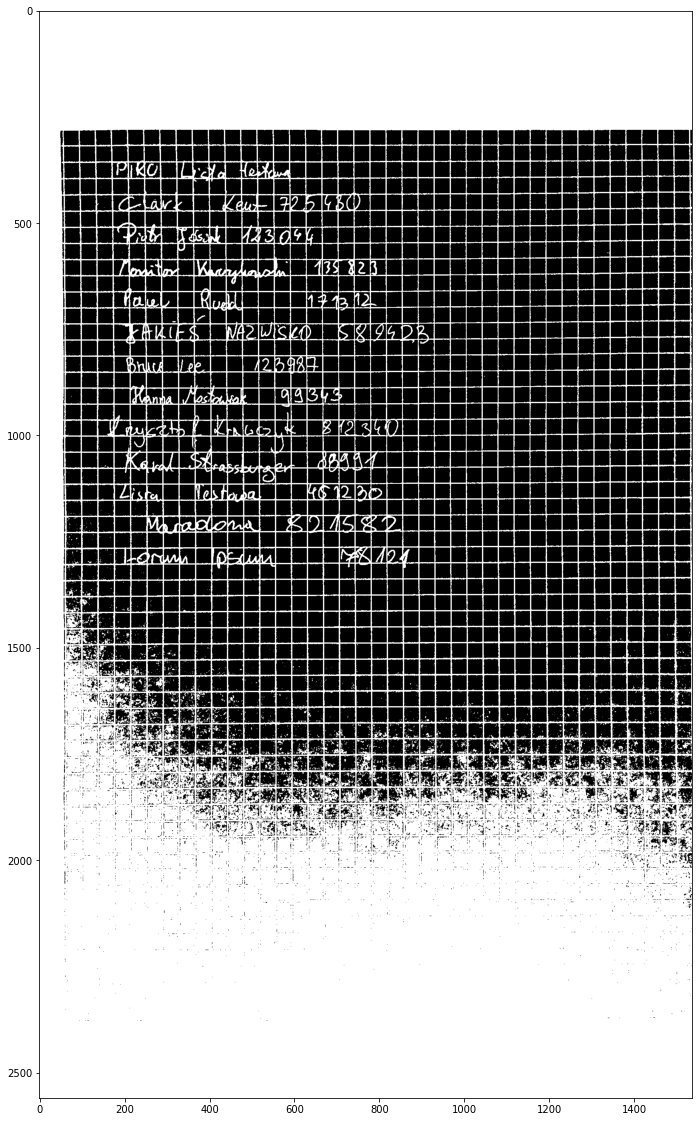

In [247]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('data/img_1.jpg', cv2.IMREAD_GRAYSCALE)
# thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
_, thresh = cv2.threshold(image, 145, 255, cv2.THRESH_BINARY_INV)
# bw = adaptiveThreshold(img, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, -2)
plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')
plt.show()

Poziome linie

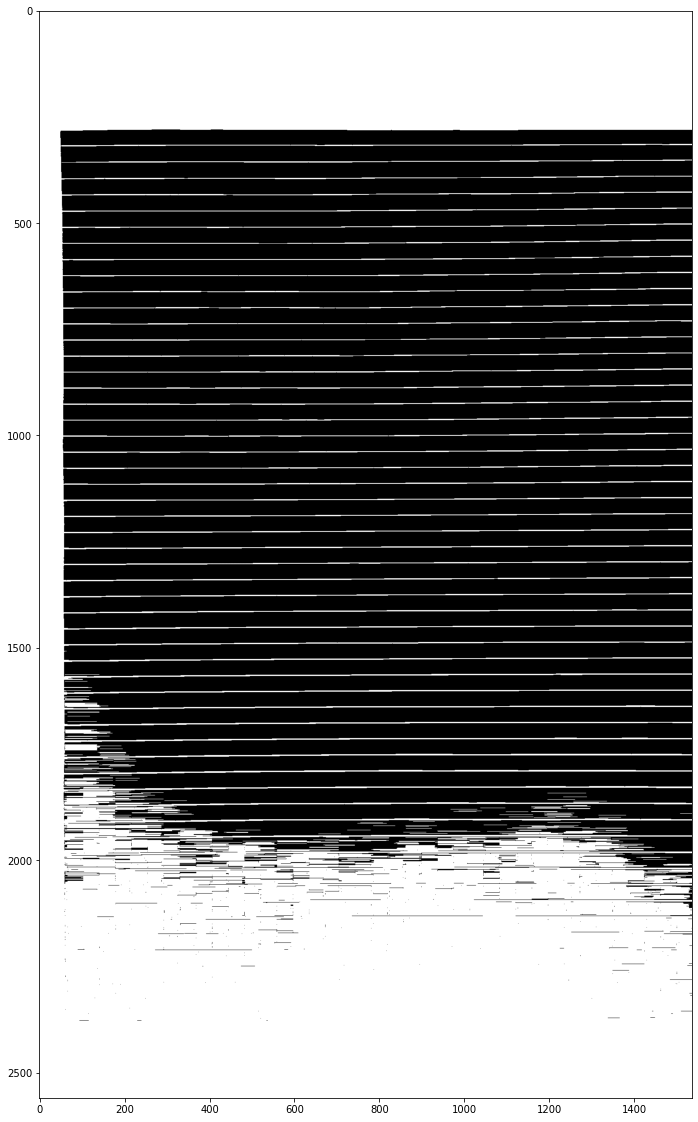

In [248]:
horizontal_size = int(thresh.shape[1] / 30)
horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontal_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_structure)

plt.figure(figsize=(20, 20))
plt.imshow(horizontal_mask, cmap='gray')
plt.show()

Pionowe linie

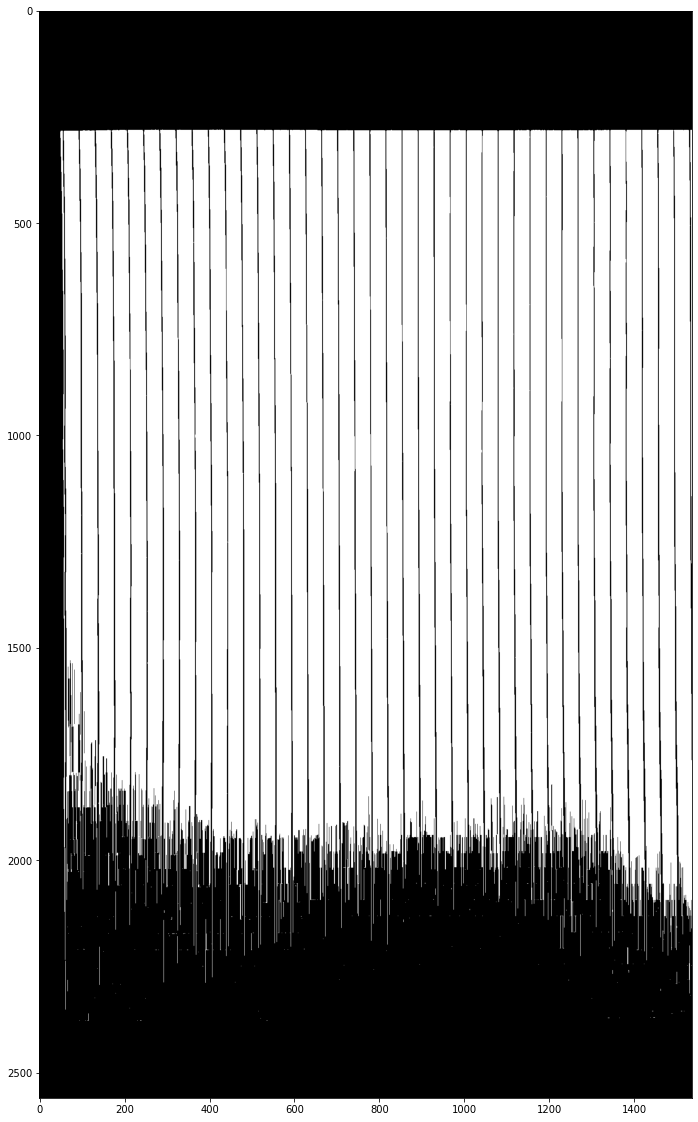

In [249]:
vertical_size = int(thresh.shape[0] / 30)
vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
vertical_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_structure)

# Contours are easier to detect on reverted mask
vertical_mask = cv2.bitwise_not(vertical_mask)

plt.figure(figsize=(20, 20))
plt.imshow(vertical_mask, cmap='gray')
plt.show()

Usuwanie masek i naprawianie przycięć

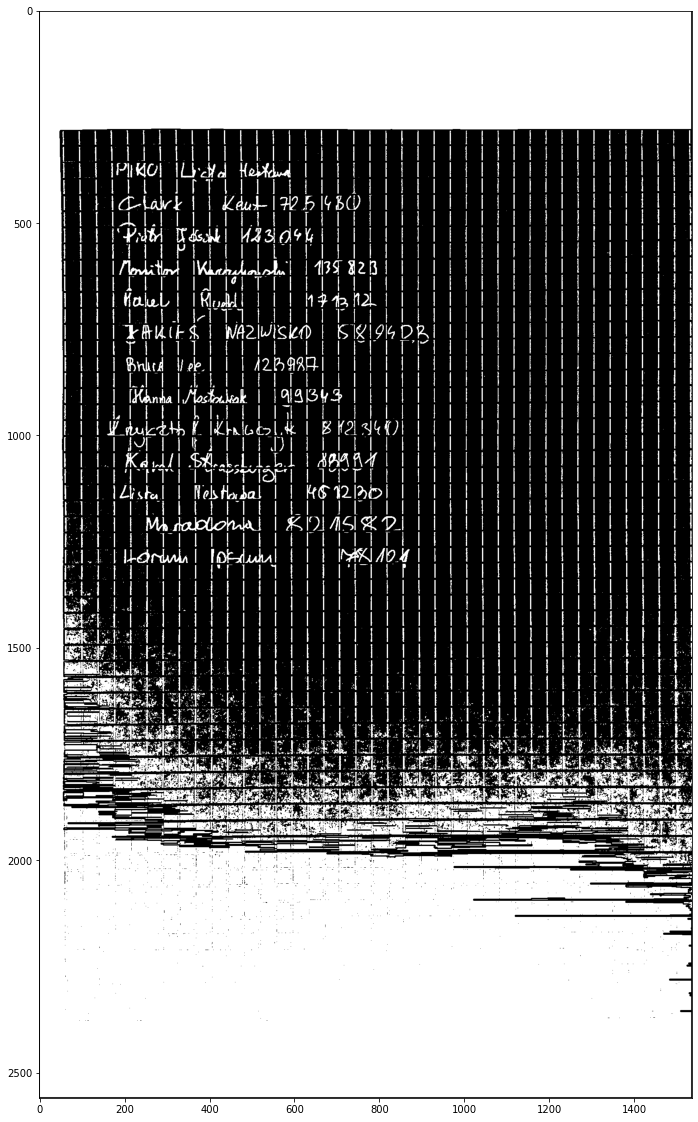

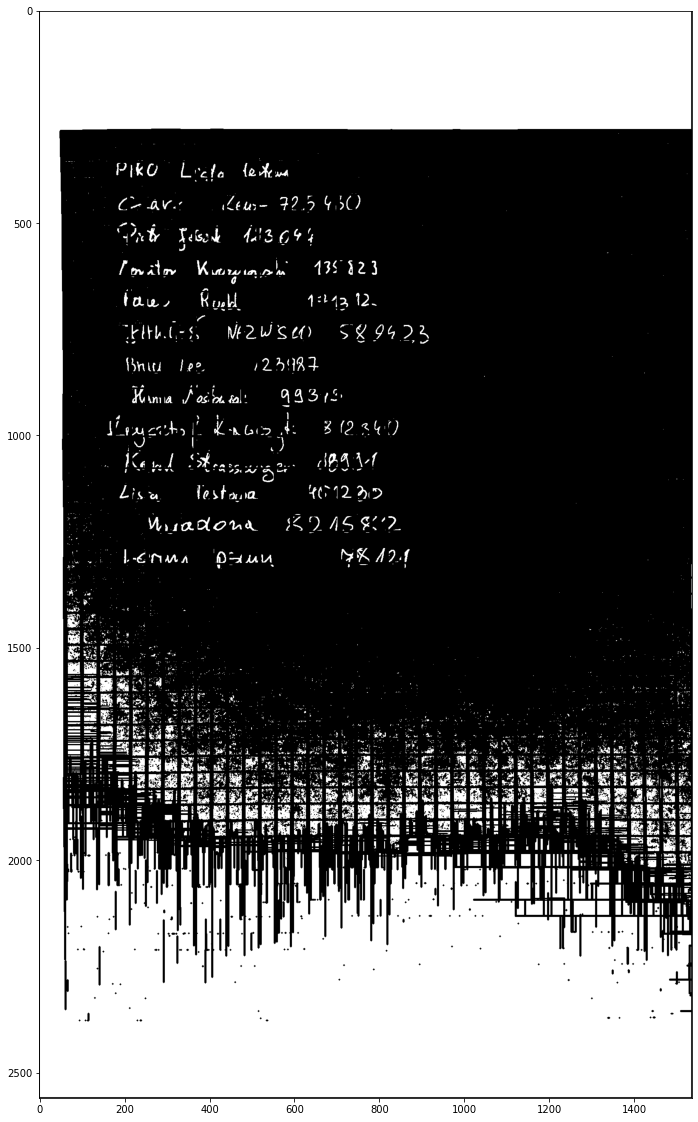

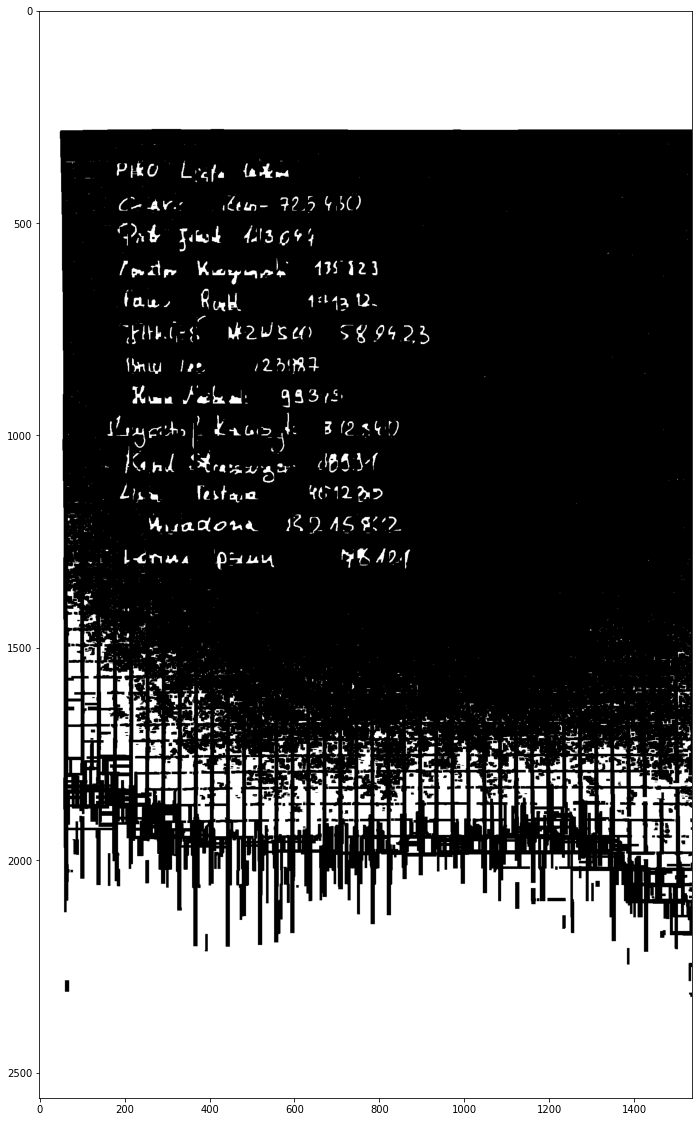

True

In [250]:
import numpy as np


def remove_lines(img_, mask_, thickness_):
    contours_ = cv2.findContours(mask_, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_ = contours_[0] if len(contours_) == 2 else contours_[1]
    for contour_ in contours_:
        cv2.drawContours(img_, [contour_], -1, (0, 0, 0), thickness_)

# Remove horizontal
remove_lines(thresh, horizontal_mask, 2)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')
plt.show()

# Remove vertical
remove_lines(thresh, vertical_mask, 3)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')
plt.show()

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 6))
result = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 1))
result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

# Alternative solution for removal of residual horizontal lines
# result_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
# result = cv2.morphologyEx(result, cv2.MORPH_OPEN, result_structure)

plt.figure(figsize=(20, 20))
plt.imshow(result, cmap='gray')
plt.show()

cv2.imwrite("dupa.png", result)